> ## **DATA PREPROCESSING**
---

> #### **IMPORTING ALL THE NECESSARY MODULES**

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

> #### **READING THE DATA AND SETTING THE COLUMN VALUES**

In [137]:
df = pd.read_csv("Train_data.csv")

In [138]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [139]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

> #### **LOOKING FOR MISSING VALUES**

In [141]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

##### **Since there are no missing Values we will proceed further to Data Encoding**

> #### **DATA ENCODING**

In [145]:
uniq = []
for col in df.columns:
    if df[col].dtype == 'object':
        uniq.append(list(df[col].unique()))
dics = []
count = 0
for i in uniq:
    dic = {}
    for j in i:
        dic[j] = count
        count +=1
    dics.append(dic)
    count = 0
k = 0
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].map(dics[k])
        k+=1

In [146]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,0,0,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,1,1,0,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,2,1,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,0,3,0,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,0,3,0,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,43,5,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,0,0,0,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,0,2,2,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,0,54,1,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


> #### **SEPARATING THE FEATURES AND REQUIRED OUTPUT**

In [149]:
y = df['class']
x = df.drop('class',axis = 1)

In [150]:
x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,1,1,0,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,2,1,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,3,0,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,3,0,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,43,5,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,0,0,0,334,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,0,2,2,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,0,54,1,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [151]:
y = np.array(y)

In [152]:
np.unique(y)

array([0, 1], dtype=int64)

> #### **SPLITTING THE TRAINING AND TESTING DATA USING TRAIN TEST SPLIT FROM SCIKIT-LEARN**

In [153]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17634, 41)
(7558, 41)
(17634,)
(7558,)


In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,RocCurveDisplay,ConfusionMatrixDisplay

> #### **SCALING THE DATA AS PER THE FEATURES**

In [156]:
scaler = StandardScaler()

In [157]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

>## **LOGISTIC REGRESSION**
---

Scikit-Learn Provides LogisticRegression within it's linear_model class, which we will use to perform logistic regression

In [158]:
from sklearn.linear_model import LogisticRegression

> #### **FITTING THE MODEL WITH SCALED X TRAINING DATA AND Y TRAINING DATA**

In [159]:
log_model = LogisticRegression()
log_model.fit(scaled_x_train,y_train)

C:\Users\avane\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

> #### **PREDICTING THE OUTPUT FOR SCALED X TESTING DATA**

In [160]:
y_pred_log = log_model.predict(scaled_x_test)

> #### **EVALUATING THE MODEL**

In [161]:
accuracy_log_model = accuracy_score(y_test,y_pred_log)
print(f"Accuracy for the Logistic Regression Model is :: {round(accuracy_log_model,5)}")

precision_log_model = precision_score(y_test,y_pred_log)
print(f"Precision for the Logistic Regression Model is :: {round(precision_log_model,5)}")

recall_log_model = recall_score(y_test,y_pred_log)
print("Recall Score for the Logistic Regression Model is ::",recall_log_model.round(5))

f1_score_log_model = f1_score(y_test,y_pred_log)
print("F1 Score for the Logistic Regression Model is :: ",f1_score_log_model.round(5))

roc_auc_score_log_model = roc_auc_score(y_test,y_pred_log)
print("Area under ROC curve for the Logistic Regression Model is :: ",roc_auc_score_log_model.round(5))

Accuracy for the Logistic Regression Model is :: 0.94893
Precision for the Logistic Regression Model is :: 0.95216
Recall Score for the Logistic Regression Model is :: 0.93695
F1 Score for the Logistic Regression Model is ::  0.94449
Area under ROC curve for the Logistic Regression Model is ::  0.94812


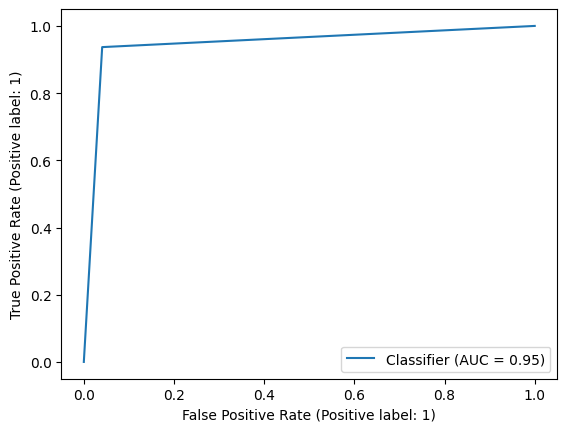

In [162]:
RocCurveDisplay.from_predictions(y_test,y_pred_log)

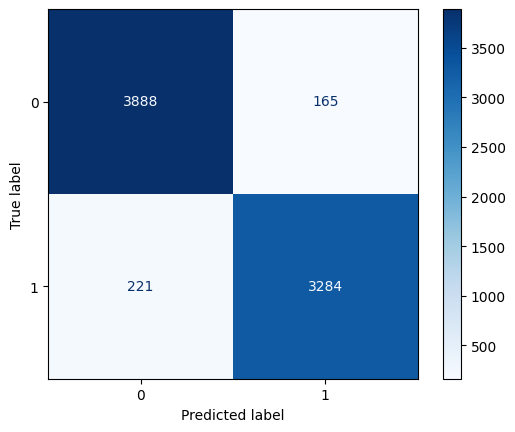

In [163]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_log,cmap='Blues')

In [164]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4053
           1       0.95      0.94      0.94      3505

    accuracy                           0.95      7558
   macro avg       0.95      0.95      0.95      7558
weighted avg       0.95      0.95      0.95      7558



> ## **K NEAREST NEIGHBOURS**

In [165]:
from sklearn.neighbors import KNeighborsClassifier

> #### **USING ELBOW METHOD TO FIND THE PERFECT K VALUE**

In [166]:
error = []

for i in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(scaled_x_train,y_train)
    y_pred_knn = knn_model.predict(scaled_x_test)
    error.append(1 - accuracy_score(y_test,y_pred_knn))

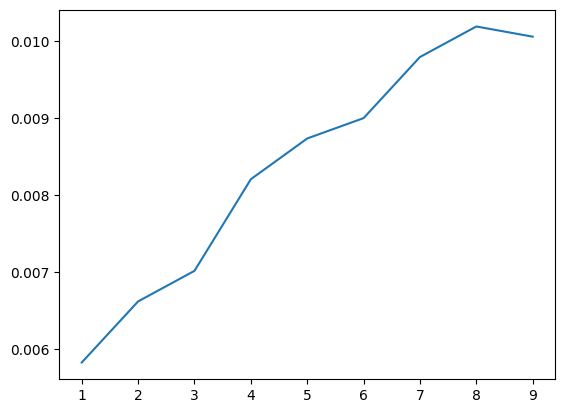

In [167]:
plt.plot(range(1,10),error)

From the graph above we can see that at $k=1$ the error is minimum.

In [168]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [169]:
knn_model.fit(X = scaled_x_train,y = y_train)

KNeighborsClassifier(n_neighbors=1)

In [170]:
y_pred_knn = knn_model.predict(scaled_x_test)

> #### **EVALUATING THE MODEL**

In [171]:
accuracy_knn_model = accuracy_score(y_test,y_pred_knn)
print(f"Accuracy for the K-Neighbour Classifier Model is :: {round(accuracy_knn_model,5)}")

precision_knn_model = precision_score(y_test,y_pred_knn)
print(f"Precision for the K-Neighbour Classifier Model is :: {round(precision_knn_model,5)}")

recall_knn_model = recall_score(y_test,y_pred_knn)
print("Recall Score for the K-Neighbour Classifier Model is ::",recall_knn_model.round(5))

f1_score_knn_model = f1_score(y_test,y_pred_knn)
print("F1 Score for the K-Neighbour Classifier Model is :: ",f1_score_knn_model.round(5))

roc_auc_score_knn_model = roc_auc_score(y_test,y_pred_knn)
print("Area under ROC curve for the K-Neighbour Classifier Model is :: ",roc_auc_score_knn_model.round(5))

Accuracy for the K-Neighbour Classifier Model is :: 0.99418
Precision for the K-Neighbour Classifier Model is :: 0.99429
Recall Score for the K-Neighbour Classifier Model is :: 0.99315
F1 Score for the K-Neighbour Classifier Model is ::  0.99372
Area under ROC curve for the K-Neighbour Classifier Model is ::  0.99411


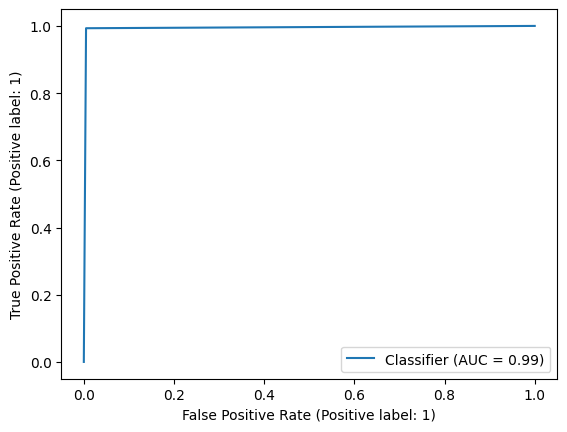

In [172]:
RocCurveDisplay.from_predictions(y_test,y_pred_knn)

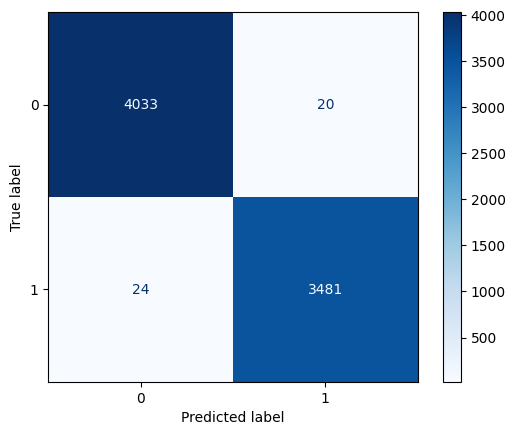

In [173]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn,cmap='Blues')

In [174]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4053
           1       0.99      0.99      0.99      3505

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



> ## **SUPPORT VECTOR CLASSIFIER**

In [175]:
from sklearn.svm import SVC

In [176]:
svc_model = SVC(C=1000)

In [177]:
svc_model.fit(scaled_x_train,y_train)

SVC(C=1000)

In [178]:
y_pred_svc = svc_model.predict(scaled_x_test)

> #### **EVALUATING THE MODEL**

In [179]:
accuracy_svc =  accuracy_score(y_test,y_pred_svc).round(5)
print("The Accuracy of Support Vector Machine is :: ",accuracy_svc)

precision_svc = precision_score(y_test,y_pred_svc)
print(f"Precision for the Support Vector Machine Model is :: {round(precision_svc,5)}")

recall_svc = recall_score(y_test,y_pred_svc)
print("Recall Score for the Support Vector Machine Model is ::",recall_svc.round(5))

f1_score_svc = f1_score(y_test,y_pred_svc)
print("F1 Score for the Support Vector Machine Model is :: ",f1_score_svc.round(5))

roc_auc_score_svc = roc_auc_score(y_test,y_pred_svc)
print("Area under ROC curve for the Support Vector Machine Model is :: ",roc_auc_score_svc.round(5))

The Accuracy of Support Vector Machine is ::  0.99458
Precision for the Support Vector Machine Model is :: 0.99317
Recall Score for the Support Vector Machine Model is :: 0.99515
F1 Score for the Support Vector Machine Model is ::  0.99416
Area under ROC curve for the Support Vector Machine Model is ::  0.99461


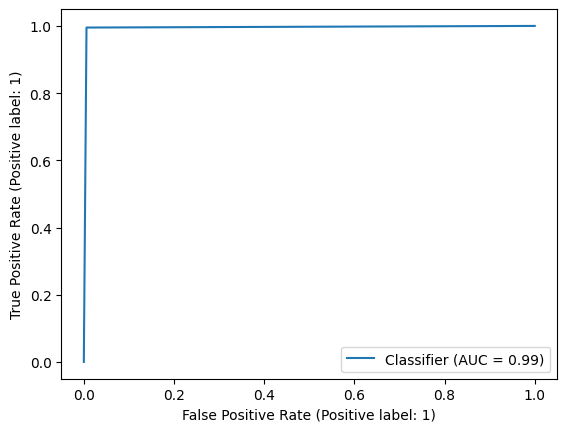

In [180]:
RocCurveDisplay.from_predictions(y_test,y_pred_svc)

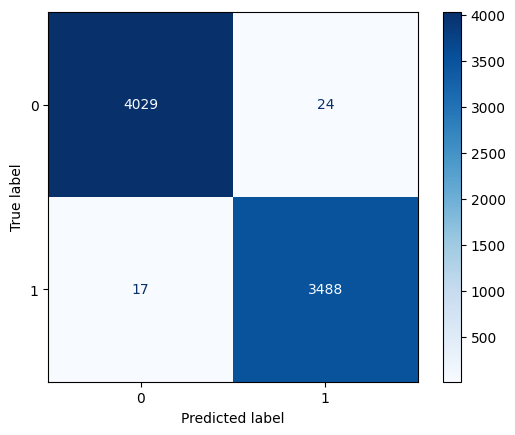

In [181]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc,cmap='Blues')

In [182]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4053
           1       0.99      1.00      0.99      3505

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



> ## **DECISION TREE CLASSIFIER**

In [183]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [184]:
decision_tree = DecisionTreeClassifier()

In [185]:
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [186]:
y_pred_dt = decision_tree.predict(x_test)

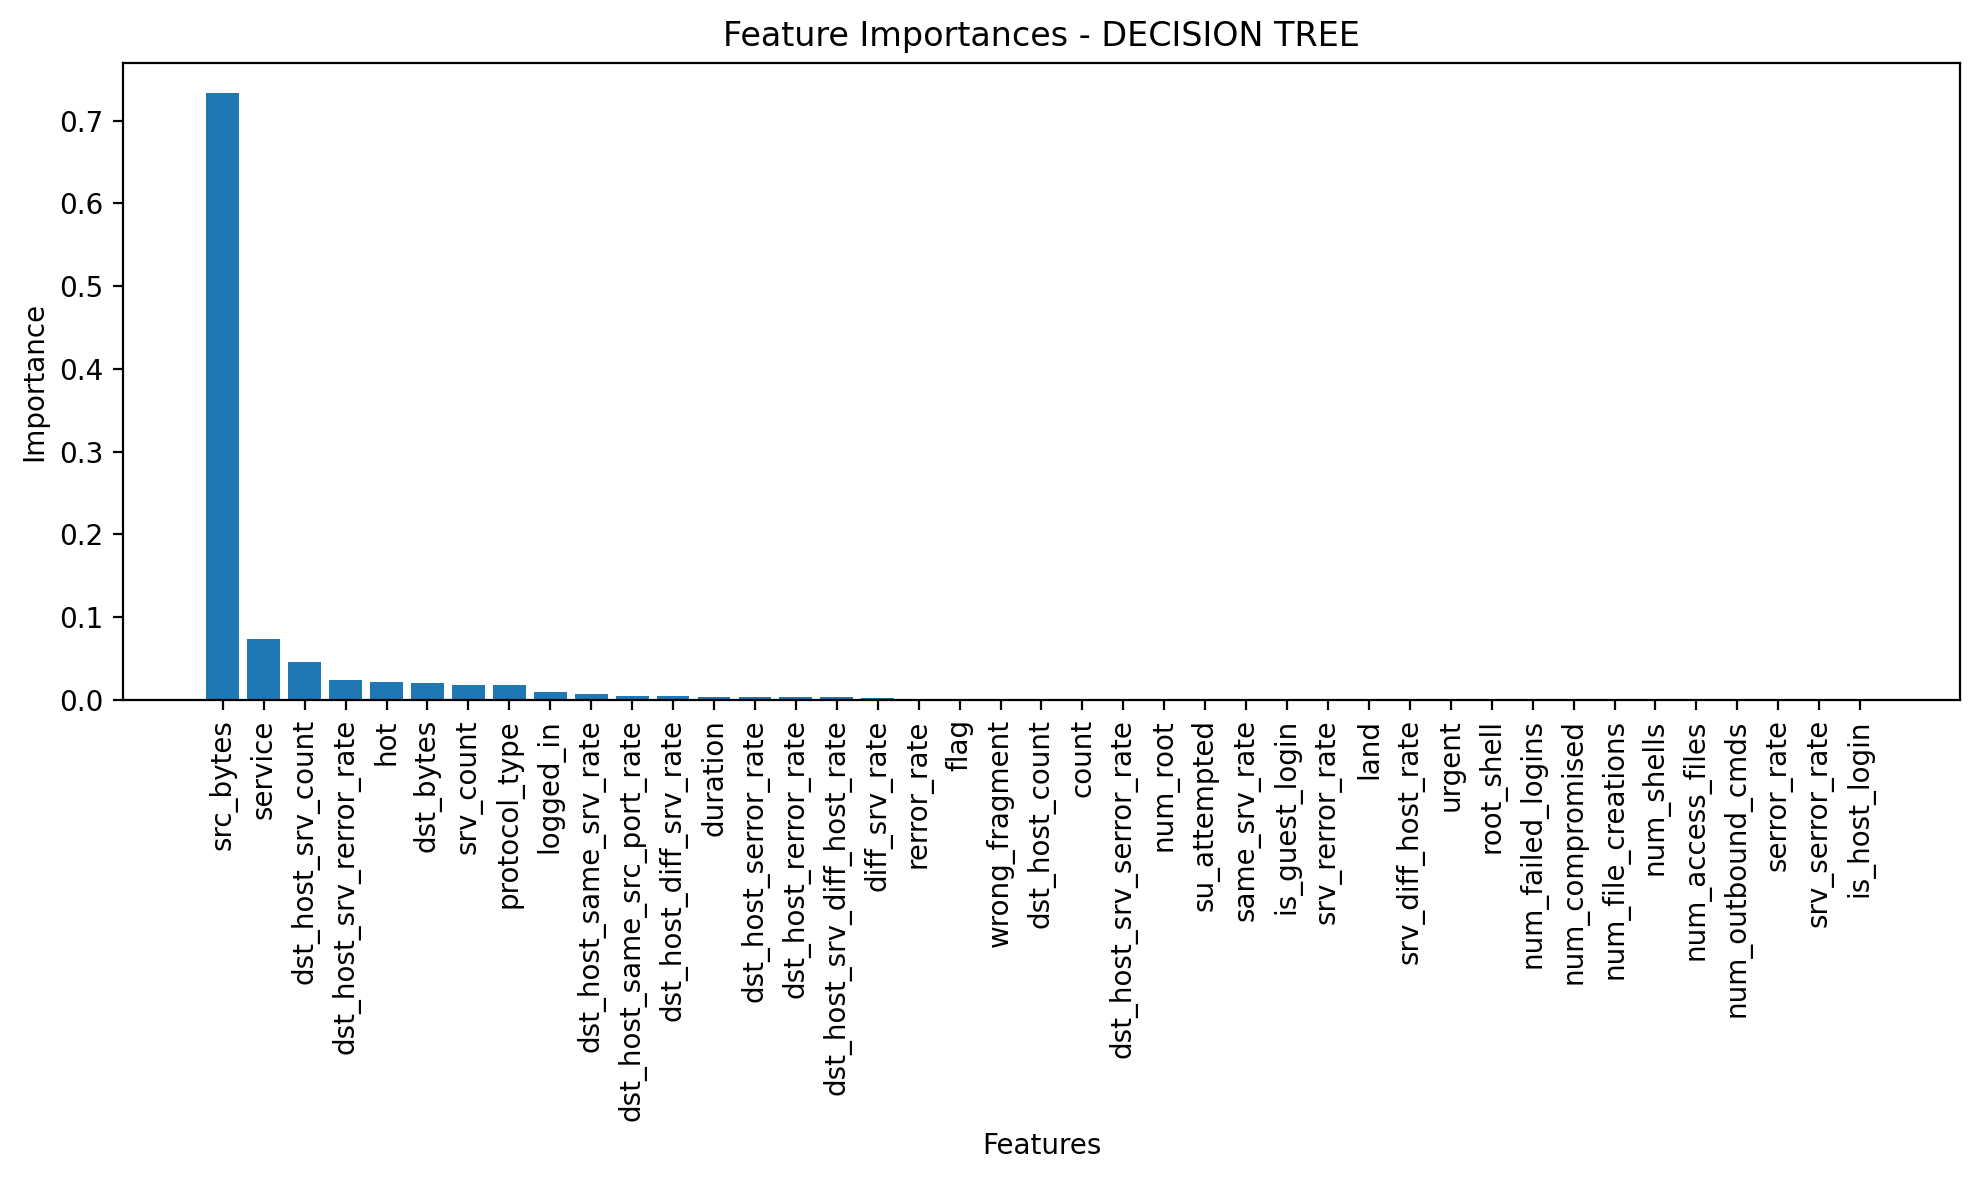

In [187]:
feature_importances = decision_tree.feature_importances_

# Get the names of the features from your dataset (assuming it's stored in a list called 'feature_names')
feature_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plotting the feature importances
plt.figure(figsize=(10, 6),dpi= 200)
plt.bar(range(len(feature_importances)), sorted_feature_importances)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - DECISION TREE')
plt.tight_layout()
plt.show()

> #### **EVALUATING THE MODEL**

In [188]:
accuracy_dt =  accuracy_score(y_test,y_pred_dt).round(5)
print("The Accuracy of Decision Tree is :: ",accuracy_dt)

precision_dt = precision_score(y_test,y_pred_dt)
print(f"Precision for the Decision Tree Model is :: {round(precision_dt,5)}")

recall_dt = recall_score(y_test,y_pred_dt)
print("Recall Score for the Decision Tree Model is ::",recall_dt.round(5))

f1_score_dt = f1_score(y_test,y_pred_dt)
print("F1 Score for the Decision Tree Model is :: ",f1_score_dt.round(5))

roc_auc_score_dt = roc_auc_score(y_test,y_pred_dt)
print("Area under ROC curve for the Decision Tree Classifier Model is :: ",roc_auc_score_dt.round(5))

The Accuracy of Decision Tree is ::  0.99603
Precision for the Decision Tree Model is :: 0.99685
Recall Score for the Decision Tree Model is :: 0.99458
F1 Score for the Decision Tree Model is ::  0.99572
Area under ROC curve for the Decision Tree Classifier Model is ::  0.99593


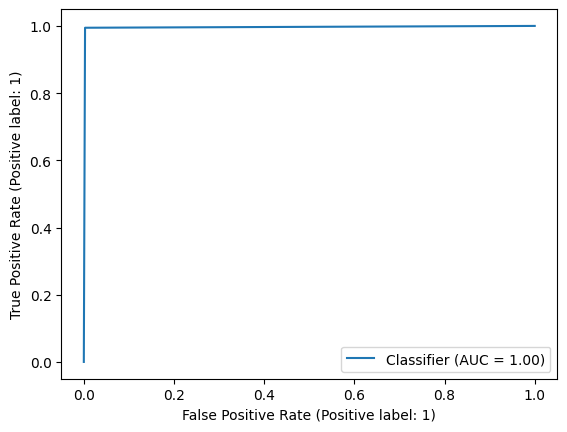

In [189]:
RocCurveDisplay.from_predictions(y_test,y_pred_dt)

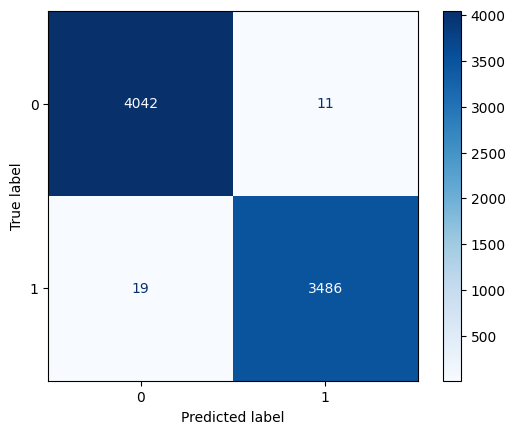

In [190]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt,cmap='Blues')

In [191]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4053
           1       1.00      0.99      1.00      3505

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



> ## **RANDOM FOREST CLASSIFIER**

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
rfc = RandomForestClassifier(n_estimators=100,bootstrap=True)

In [194]:
rfc.fit(scaled_x_train, y_train)

RandomForestClassifier()

In [195]:
y_pred_rfc = rfc.predict(scaled_x_test)

In [196]:
# creating a pickle file for the random forest classifier model so it can be used in a web application

import pickle

with open('rfc_model.pickle', 'wb') as file:
    pickle.dump(rfc, file)


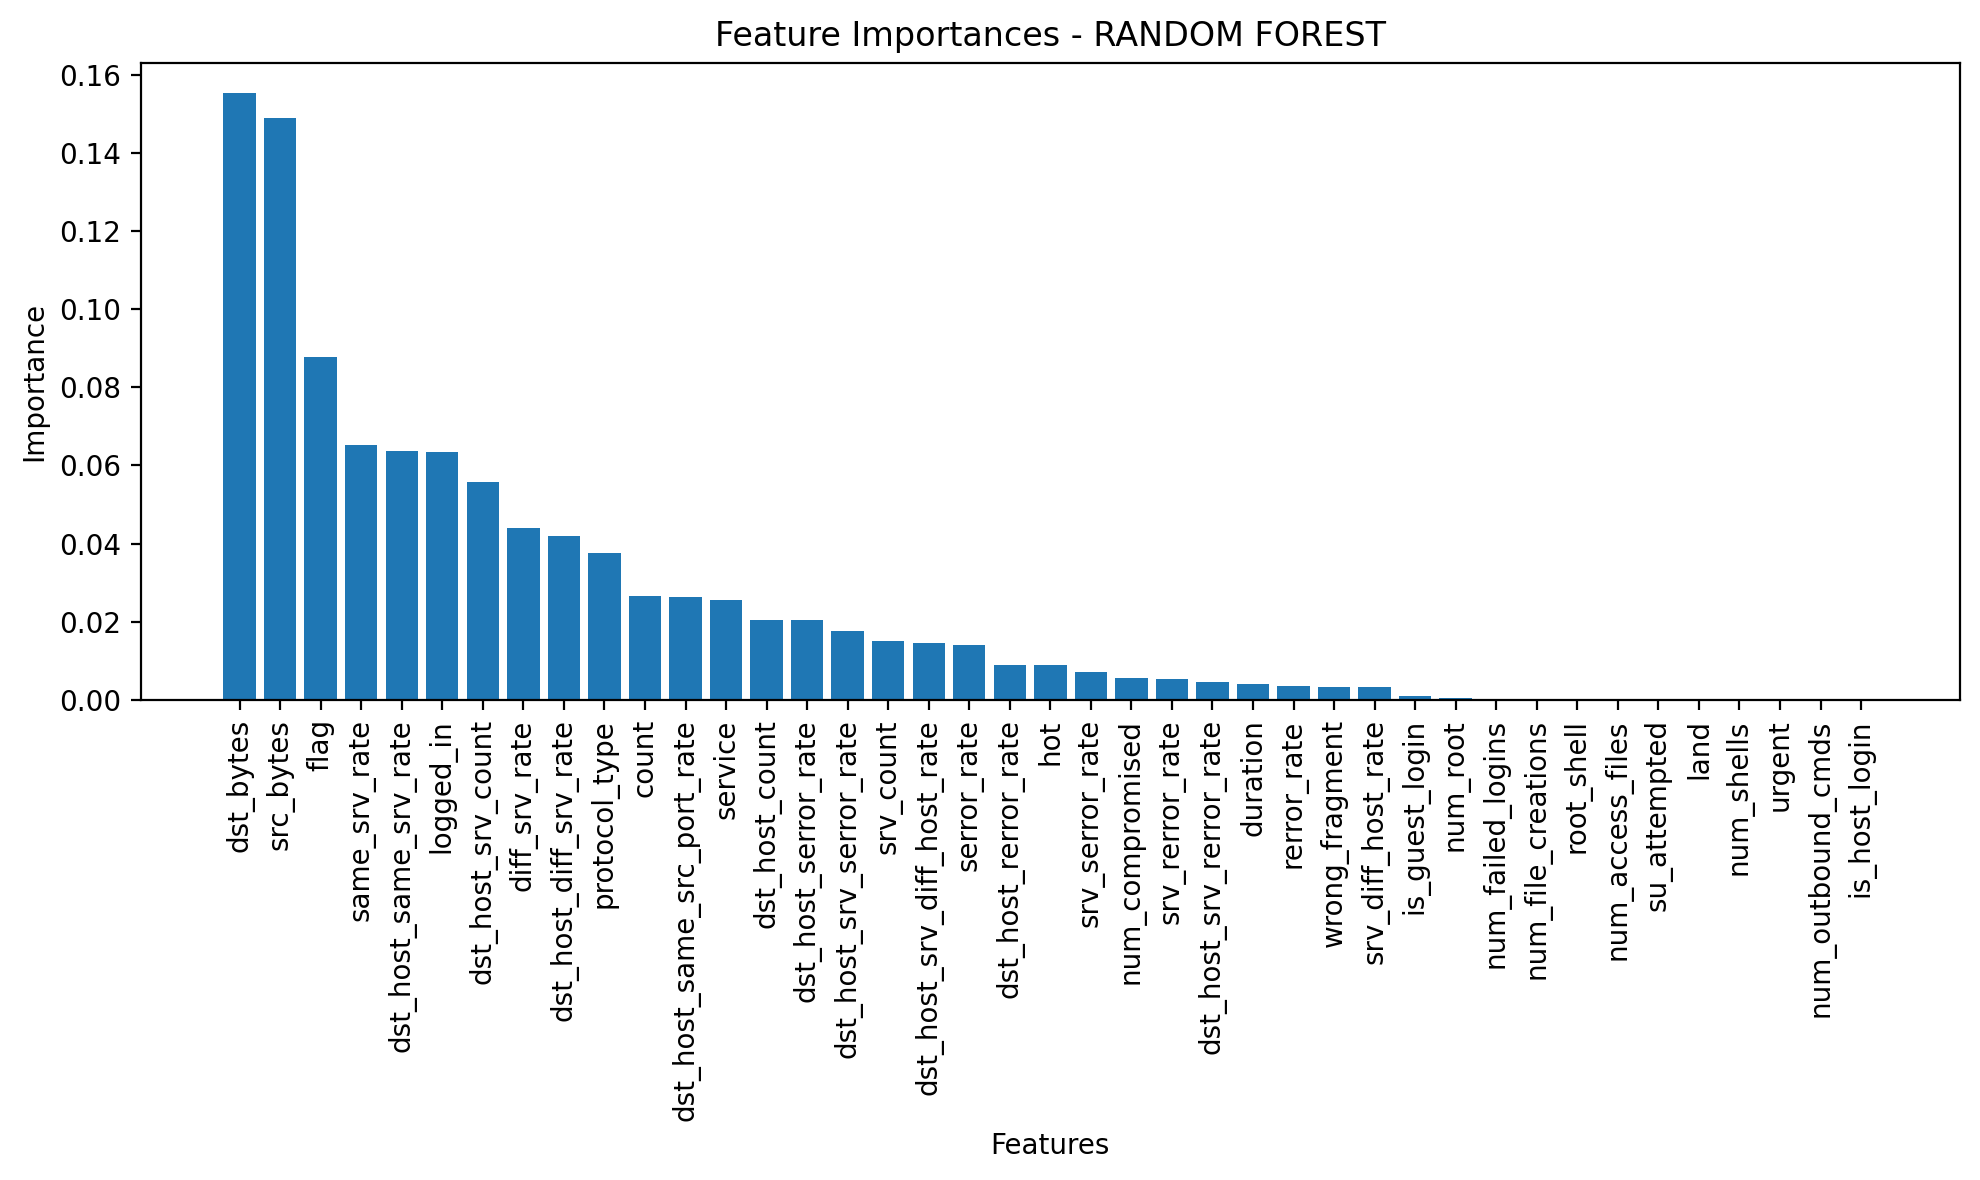

In [197]:
feature_importances = rfc.feature_importances_

# Get the names of the features from your dataset (assuming it's stored in a list called 'feature_names')
feature_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plotting the feature importances
plt.figure(figsize=(10, 6),dpi=200)
plt.bar(range(len(feature_importances)), sorted_feature_importances)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - RANDOM FOREST')
plt.tight_layout()
plt.show()


> #### **EVALUATING THE MODEL**

In [198]:
accuracy_rfc =  accuracy_score(y_test,y_pred_rfc).round(5)
print("The Accuracy of Random Forest Classifier is :: ",accuracy_rfc)

precision_rfc = precision_score(y_test,y_pred_rfc)
print(f"Precision for the Random Forest Classifier Model is :: {round(precision_rfc,5)}")

recall_rfc = recall_score(y_test,y_pred_rfc)
print("Recall Score for the Random Forest Classifier Model is ::",recall_rfc.round(5))

f1_score_rfc = f1_score(y_test,y_pred_rfc)
print("F1 Score for the Random Forest Classifier Model is :: ",f1_score_rfc.round(5))

roc_auc_score_rfc = roc_auc_score(y_test,y_pred_rfc)
print("Area under ROC curve for the Random Forest Classifier Model is :: ",roc_auc_score_rfc.round(5))

The Accuracy of Random Forest Classifier is ::  0.99722
Precision for the Random Forest Classifier Model is :: 0.998
Recall Score for the Random Forest Classifier Model is :: 0.99601
F1 Score for the Random Forest Classifier Model is ::  0.997
Area under ROC curve for the Random Forest Classifier Model is ::  0.99714


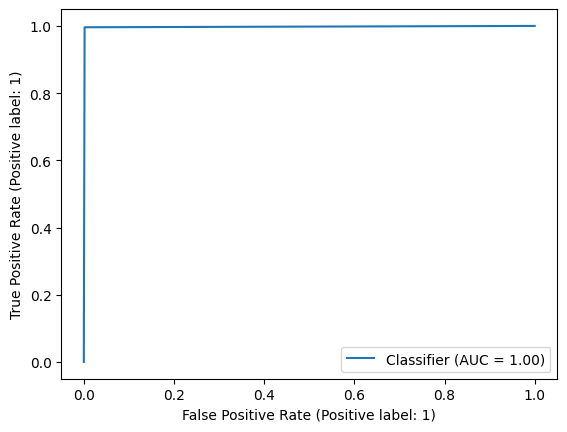

In [199]:
RocCurveDisplay.from_predictions(y_test,y_pred_rfc)

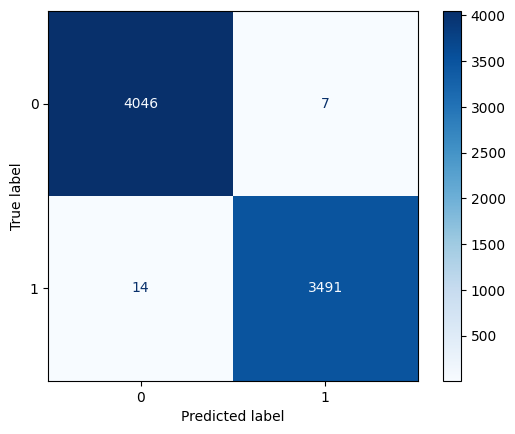

In [200]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc,cmap='Blues')

In [201]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4053
           1       1.00      1.00      1.00      3505

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



> ## **COMPARING THE MODELS**
---

In [202]:
combined_accuracy = np.array([accuracy_log_model,accuracy_knn_model,accuracy_svc,accuracy_dt,accuracy_rfc])
combined_precision = np.array([precision_log_model,precision_knn_model,precision_svc,precision_dt,precision_rfc])
combined_recall = np.array([recall_log_model,recall_knn_model,recall_svc,recall_dt,recall_rfc])
combined_f1_score = np.array([f1_score_log_model,f1_score_knn_model,f1_score_svc,f1_score_dt,f1_score_rfc])
combined_roc_auc_score = np.array([roc_auc_score_log_model,roc_auc_score_knn_model,roc_auc_score_svc,roc_auc_score_dt,roc_auc_score_rfc])

In [203]:
comparing_models = pd.DataFrame(data=[combined_accuracy,combined_precision,combined_recall,combined_f1_score,combined_roc_auc_score])

In [204]:
comparing_models.columns = ['LOGISTIC REGRESSION', 'K-NEAREST NEIGHBOUR', 'SUPPORT VECTOR CLASSIFIER', 'DECISION TREE CLASSIFIER', 'RANDOM FOREST CLASSIFIER']
comparing_models.index = ['ACCURACY','PRECISION','RECALL','F1 SCORE','AUC ROC SCORE']

In [205]:
comparing_models = comparing_models.round(4)

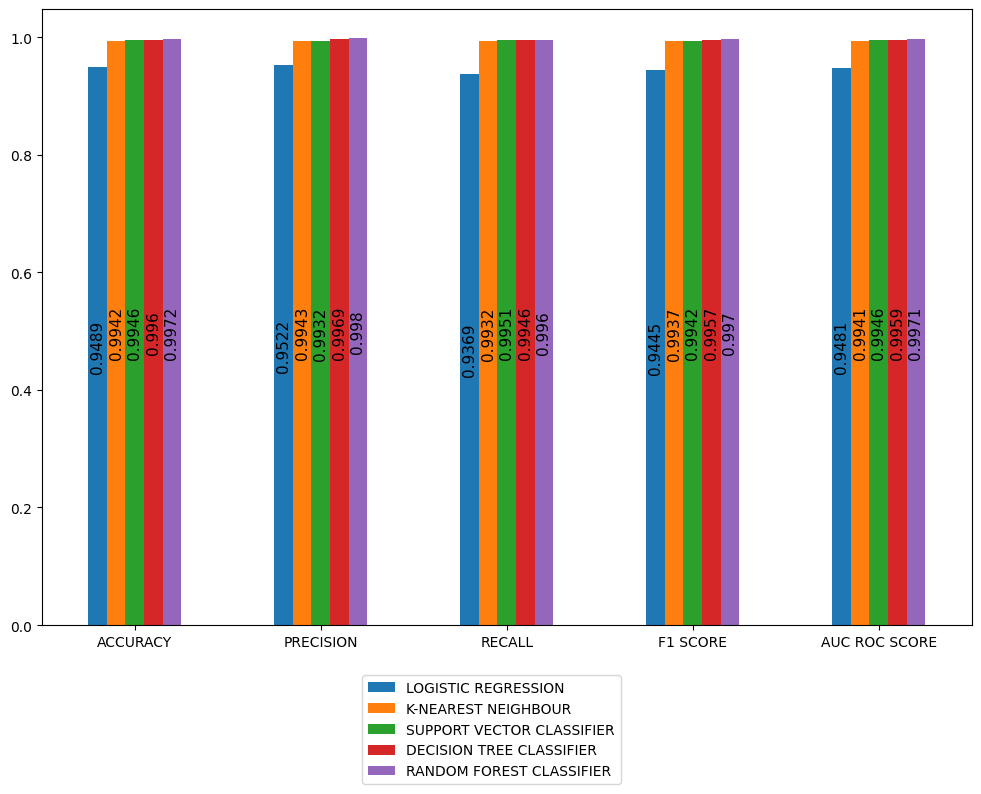

In [206]:
# light_palette = sns.color_palette("Set2")
ax = comparing_models.plot(kind = 'bar',figsize=(12,8))

for container in ax.containers:
    ax.bar_label(container,label_type='center',fontsize=11,rotation=90,color = "black")

plt.xticks(rotation=0)
plt.legend(bbox_to_anchor =(0.63, -0.07), ncol = 1)

### From the **Bar Graph** we can clearly see that the **Random Forest Classifier** is the best Classification Model for our given DataSet